# <html><p style="color:blue">Valuation: Azul Linhas Aéreas AZUL4 (BVMF)</p>
<img src="azul-aviao-696x438.jpg" alt="Azul">
</html>

In [1]:
# Importando Pacotes
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Fonte: <html><a href="https://ri.voeazul.com.br/">RI Azul</a></html>

In [2]:
# Ler arquivo
AZUL4 = pd.ExcelFile('Azul_4T21.xlsx')

## DRE

In [3]:
# Montar a DRE
DRE = AZUL4.parse('DRE')

In [4]:
# Deixar somente a DRE na planilha
#     Colunas
DRE = DRE.iloc[:, 3:26]
#     Linhas
DRE = DRE.iloc[5:44,:]

In [5]:
# Manter somente linhas e colunas com valores
DRE.dropna(subset=['Unnamed: 3'], inplace=True)
DRE = DRE.dropna(axis=1, how='all')
DRE = DRE.reset_index(drop=True)

In [6]:
# Ajustar linhas com marcadores de tempo
DRE.iloc[0] = DRE.iloc[0].astype(str).str[0:4]

In [7]:
# Ajustar índices de linha e coluna
DRE = DRE.set_index(DRE.columns[0])
DRE.columns = DRE.iloc[0]
DRE = DRE.drop(DRE.index[0])

In [8]:
# DRE anual e por trimestre
DRE_Q = DRE.iloc[:,0:16]
DRE_Y = DRE.iloc[:,16:]

In [9]:
DRE_Q

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Unnamed: 3,,,,,,,,,,,,,,,,
Receita líquida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transporte de passageiros,2111803,1905723,2312045,2340561,2434414,2487639,2887874,3097962,2653419,282537,624491,1528299.60927,1597642,1417436,2400206,3395760
Outras receitas,80126.79328,88499,103686,114620,107579,130056,142860,153933,149256,119055,180835,255373,228180,284930,317595,333980
Total receita líquida,2191929.79328,1994222,2415731,2455181,2541993,2617695,3030734,3251895,2802675,401592,805326,1783672.60927,1825822,1702366,2717801,3729740
Custos dos serviços prestados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Combustível de aviação,-577240,-563003,-737227,-766791,-695142,-747640,-811333,-831488,-764310,-67299,-226134,-451007,-597666,-609362,-879238,-1170957
Salários e benefícios,-333770,-354705,-369898,-354644,-457611,-425085,-483534,-502172,-478077,-219976,-309557,-419026,-414520,-421164,-445504,-467253
Arrendamento mercantil de aeronaves e outros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tarifas aeroportuárias,-144914,-141084,-157201,-148901,-168092,-169270,-193207,-194402,-201907,-43758,-73777,-146164,-149343,-138790,-188488,-201032


## BP

In [10]:
# Montar o BP
BP = AZUL4.parse('Balanço')

In [11]:
# Deixar somente a DRE na planilha
#    Colunas
BP = BP.iloc[:, 3:21]
#    Linhas
BP = BP.iloc[5:65,:]

In [12]:
# Manter somente linhas e colunas com valores
BP.dropna(subset=['Unnamed: 3'], inplace=True)
BP = BP.dropna(axis=1, how='all')
BP = BP.reset_index(drop=True)

In [13]:
# Ajustar índices de linha e coluna
BP = BP.set_index(BP.columns[0])
BP.columns = BP.iloc[0]
BP = BP.drop(BP.index[0])

In [14]:
list(BP.index.values)

['Ativo',
 'Circulante',
 'Caixa e equivalentes de caixa',
 'Aplicações financeiras',
 'Aplicações financeiras vinculadas',
 'Contas a receber, líquido',
 'Subarrendamento de aeronaves a receber',
 'Estoques',
 'Depósitos em garantia e reservas de manutenção',
 'Ativos disponíveis para a venda',
 'Tributos a recuperar',
 'Instrumentos financeiros derivativos',
 'Despesas antecipadas',
 'Outros ativos',
 'Ativo não circulante',
 'Aplicações financeiras de longo prazo',
 'Subarrendamento de aeronaves a receber',
 'Depósitos em garantia e reservas de manutenção',
 'Instrumentos financeiros derivativos',
 'Despesas antecipadas',
 'Impostos a recuperar',
 'Impostos de renda diferido',
 'Outros ativos',
 'Direito de uso - arrendamentos',
 'Direito de uso - manutenção de aeronaves',
 'Imobilizado',
 'Intangível',
 'Passivo',
 'Passivo circulante',
 'Empréstimos e financiamentos',
 'Passivo de arrendamento',
 'Fornecedores',
 'Transportes a executar',
 'Salários, provisões e encargos sociais',

In [15]:
# A conta de Emprestimos de Curto e Longo Prazo tem o mesmo nome: Adicionei um C nas de Curto Prazo.
BP.set_axis(['Ativo',
 'Circulante',
 'Caixa e equivalentes de caixa',
 'Aplicações financeiras',
 'Aplicações financeiras vinculadas',
 'Contas a receber, líquido',
 'Subarrendamento de aeronaves a receber',
 'Estoques',
 'Depósitos em garantia e reservas de manutenção',
 'Ativos disponíveis para a venda',
 'Tributos a recuperar',
 'Instrumentos financeiros derivativos',
 'Despesas antecipadas',
 'Outros ativos',
 'Ativo não circulante',
 'Aplicações financeiras de longo prazo',
 'Subarrendamento de aeronaves a receber',
 'Depósitos em garantia e reservas de manutenção',
 'Instrumentos financeiros derivativos',
 'Despesas antecipadas',
 'Impostos a recuperar',
 'Impostos de renda diferido',
 'Outros ativos',
 'Direito de uso - arrendamentos',
 'Direito de uso - manutenção de aeronaves',
 'Imobilizado',
 'Intangível',
 'Passivo',
 'Passivo circulante',
 'Empréstimos e financiamentos C', # Linha com Emprestimos de CP
 'Passivo de arrendamento',
 'Fornecedores',
 'Transportes a executar',
 'Salários, provisões e encargos sociais',
 'Prêmios de seguros a pagar',
 'Tributos a recolher',
 'Programa de recuperação fiscal',
 'Instrumentos financeiros derivativos',
 'Reembolso a clientes',
 'Provisões',
 'Outros passivos circulantes',
 'Não circulante',
 'Empréstimos e financiamentos',
 'Passivo de arrendamento',
 'Accounts payable',
 'Reembolso a clientes',
 'Instrumentos financeiros derivativos',
 'Imposto de renda e contribuição social diferidos',
 'Programa de recuperação fiscal',
 'Provisões',
 'Outros passivos não circulantes',
 'Patrimônio líquido',
 'Capital social',
 'Adiantamentos para aumento de capital',
 'Reserva de capital',
 'Ações em tesouraria',
 'Outros resultados abrangentes',
 'Prejuízo acumulado'], axis=0, inplace=True)

In [16]:
BP

(R$ 000),4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Ativo,13916485,14189141,14818590,15669185,16094398,16895685,17972706,18854197,19197490,18816916,15164137,13926323,15794457,15192453,17386730,17777995,18533473
Circulante,3464044,3132895,3453866,3651825,3756358,3580026,3882929,4050057,4138731,3572542,3489210,3605273,5417423,4562773,6755204,6771661,5846336
Caixa e equivalentes de caixa,762319,738940,848961,893676,1169136,908388,1212998,1522084,1647880,529236,1566366,1435714,3064815,2275430,4339074,3633321,3073799
Aplicações financeiras,1036148,627683,725287,667620,517423,396823,261781,41053,62009,738141,64733,133548,91819,10624,1049,1180,1430
Aplicações financeiras vinculadas,8808,3937,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Contas a receber, líquido",913797,1166112,1175690,1340772,1069056,1352102,1405390,1424073,1165866,909004,622642,729609,875382,865604,1111243,1566095,997893
Subarrendamento de aeronaves a receber,57768,59291,70258,74524,73671,65201,43271,84845,75052,106955,148607,138932,123455,153316,79352,86569,76199
Estoques,150393,175138,171465,198369,200145,224872,229726,263851,260865,380205,399269,376442,402587,454160,479243,519557,571924
Depósitos em garantia e reservas de manutenção,130112,0,0,0,210356,0,0,0,258212,368628,310655,461848,318460,275294,257296,389793,410912
Ativos disponíveis para a venda,0,0,96600,0,0,0,0,0,51850,51850,43640,0,0,0,0,0,0


## Fluxo de caixa

In [17]:
# Trazando DFC que montei
DFC = pd.read_excel('DFC_final.xlsx')

In [18]:
# Colocar o nome da conta com indice
DFC.set_index('Unnamed: 0', inplace=True)

In [19]:
DFC

,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Unnamed: 0,,,,,,,,,,,,,,,,
Caixa gerado em atividades operacionais,96300.0,377000.0,601900.0,599300.0,215800.0,750400.0,736700.0,891700,42900.0,508400.0,208500.0,216400.0,-358600.0,-219400.0,-69800.0,337200.0
CAPEX,-274300.0,-277500.0,-337500.0,-297300.0,-425500.0,-256900.0,-360500.0,-53600,-248800.0,-63600.0,-83200.0,-95800.0,-237900.0,-132000.0,-143000.0,-284000.0
Aquisição - Azul Conecta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-4.7,-13.0,-21.0,-20.0,0.0,0.0,0.0
Aquisição Intangível,-10.9,-23.1,-38.3,-28.0,-23.8,-33.0,-22.0,-53.6,-26.2,-16.9,-26.1,-40.4,-41.6,-26.4,-48.2,-36.4
Aquisição Imobilizado,-263.4,-254.4,-299.2,-269.3,-401.7,-223.9,-338.5,(463.9,-222.6,-42.0,-44.1,-34.4,-176.3,-105.6,-94.8,-247.6
Caixa gerado em atividades de investimento,192800.0,-213100.0,-109100.0,-144300.0,-398700.0,-171400.0,-78600.0,-538200,-928000.0,614000.0,-106000.0,16200.0,-156400.0,-122400.0,-143100.0,-284200.0
Empréstimos,-59400.0,-335400.0,-211900.0,-44100.0,258400.0,-20600.0,87500.0,156900,-25100.0,46800.0,-19100.0,1756600.0,-48300.0,2761900.0,-49400.0,-59500.0
Captação,0.0,98.9,0.0,0.0,292.0,0.0,115.8,184.5,0.0,0.0,94.6,1794.8,4.8,3004.1,57.7,4.7
Pagamentos,-59.4,-434.3,-211.9,-44.1,-33.6,-20.6,-28.3,-27.6,-25.1,46.8,-113.7,-38.2,-53.1,-242.2,-47.1,-48.6


## Criar tabela com indicadores

###### Em Valuations que fiz antes, gostava de criar uma tabela com os principais indicadores que eu uso, por isso coloquei todos abaixo. Vou esconder os que não foram utilizados.

In [20]:
# Gerar a tabela
ind = pd.DataFrame(columns=DRE_Q.columns)

In [21]:
# Necessidade de Capital de Giro
ind.loc['NCG'] = BP.loc['Circulante'] - BP.loc['Caixa e equivalentes de caixa'] - BP.loc['Aplicações financeiras'] - ((BP.loc['Passivo circulante'] - BP.loc['Empréstimos e financiamentos C']))

In [22]:
# Capital de Giro
ind.loc['CDG'] = BP.loc['Circulante'] - BP.loc['Passivo circulante']

In [23]:
ind.loc['AE'] = ind.loc['NCG'] - BP.loc['Ativo não circulante']

In [24]:
ind.loc['Aplicações Financeiras'] = BP.loc['Caixa e equivalentes de caixa'] + BP.loc['Aplicações financeiras']

In [25]:
ind.loc['Receita Op Liquida'] = DRE_Q.loc['Total receita líquida']

In [26]:
ind.loc['Ciclo Financeiro $'] = ind.loc['NCG']/ind.loc['Receita Op Liquida']

In [27]:
ind.loc['Ativo Circulante'] = BP.loc['Circulante']

In [28]:
ind.loc['Ativo Realizavel de Longo Prazo'] = BP.loc['Aplicações financeiras de longo prazo']

In [29]:
ind.loc['Ativo Permanente'] = BP.loc['Ativo não circulante'] - BP.loc['Aplicações financeiras de longo prazo']

In [30]:
ind.loc['Passivo Circulante'] = BP.loc['Passivo circulante']

In [31]:
ind.loc['Passivo Exigivel de LP'] = BP.loc['Não circulante']

In [32]:
ind.loc['Patrimônio Líquido'] = BP.loc['Patrimônio líquido']

In [33]:
ind.loc['Dívida'] = BP.loc['Empréstimos e financiamentos C'] + BP.loc['Empréstimos e financiamentos'] - ind.loc['Aplicações Financeiras']

In [34]:
ind.loc['EBIT'] = DRE_Q.loc['Lucro / (prejuízo) operacional']

In [35]:
ind.loc['NOPAT'] = ind.loc['EBIT'] - (DRE_Q.loc['Imposto de renda e contribuição social'] - DRE_Q.loc['Imposto de renda e contribuição social diferidos '])

In [36]:
ind.loc['EBITDA'] = DRE_Q.loc['EBITDA']

In [37]:
ind.loc['Lucro Liquido'] = DRE_Q.loc['Prejuízo líquido do exercício']

In [38]:
ind.loc['Debt/EBITDA'] = ind.loc['Dívida']/ind.loc['EBITDA']

In [39]:
ind.loc['Resultado Financeiro'] = DRE_Q.iloc[19]

In [40]:
ind.loc['Despesas Financeiras'] = DRE_Q.loc['Despesas financeiras ']

In [41]:
ind.loc['Depreciação'] = DRE_Q.loc['Depreciação e amortização ']

In [42]:
ind.loc['Depreciação/Ativo Permanente'] = ind.loc['Depreciação']/ind.loc['Ativo Permanente']

In [43]:
ind.loc['Depreciação/CAPEX'] = ind.loc['Depreciação']/DFC.loc['CAPEX']

In [44]:
ind.loc['Imposto de Renda %'] = (DRE_Q.loc['Imposto de renda e contribuição social'] + DRE_Q.loc['Imposto de renda e contribuição social diferidos '])/DRE_Q.loc['Lucro (prejuízo) antes do IR e contribuição social']

In [45]:
ind.loc['Perfil da FLP'] = (ind.loc['Passivo Exigivel de LP']/(ind.loc['Passivo Exigivel de LP']+ind.loc['Patrimônio Líquido']))

In [46]:
ind.loc['n_shares'] = [325310485, 325310485, 325310485, 325310485, 328571282, 328571282, 328571282, 328571282, 329779360, 329779360, 329779360, 329779360, 333286277, 333286277, 333286277, 333286277]

In [47]:
# Lista de datas que representam o fim de cada trimestre
dates = [dt.datetime(2018, 3, 31) ,dt.datetime(2018, 6, 30) ,dt.datetime(2018, 9, 30) ,dt.datetime(2018, 12, 31) ,dt.datetime(2019, 3, 31) ,dt.datetime(2019, 6, 30) ,dt.datetime(2019, 9, 30) ,dt.datetime(2019, 12, 31) ,dt.datetime(2020, 3, 31) ,dt.datetime(2020, 6, 30) ,dt.datetime(2020, 9, 30) ,dt.datetime(2020, 12, 31) ,dt.datetime(2021, 3, 31) ,dt.datetime(2021, 6, 30) ,dt.datetime(2021, 9, 30) ,dt.datetime(2021, 12, 31)]

In [48]:
# Pegar o valor das ações nos períodos que eu desejo
x = [] #Criar Lista
for i in dates:
    date = pd.to_datetime(i) # Padronizar o formato das datas
    azul = web.get_data_yahoo('AZUL4.SA', start=date)['Adj Close'] # Trazer as ações e pegar só o preço de fechamento
    x.append(azul[0]) # Colocar na lista
a_series = pd.Series(x, index = ind.columns, name = 'price_shares') # Transformar numa pandas.Series
ind = ind.append(a_series, ignore_index=False) # Colocar na tabela

In [49]:
# Valor de Mercado do Equity, para substituir o patrimônio liquido negativo: Market Cap x Numero de Ações
# Dividindo por mil para ajustar esse preço aos outros que estão nesta escala.
ind.loc['Market Value of Equity'] = ind.loc['n_shares'] * ind.loc['price_shares'] / 1000

In [50]:
# Relação Dívida/Patrimônio Líquido
ind.loc['Debt/Equity'] = ind.loc['Dívida']/(ind.loc['Market Value of Equity']+ind.loc['Dívida'])

In [51]:
ind.loc['Equity/Debt'] = ind.loc['Market Value of Equity']/(ind.loc['Market Value of Equity']+ind.loc['Dívida'])

In [52]:
ind.loc['Liquidez Corrente'] = ind.loc['Ativo Circulante']/ind.loc['Passivo Circulante']

In [53]:
ind.loc['Margem Bruta'] = DRE_Q.loc['Lucro / (prejuízo) operacional']/DRE_Q.loc['Total receita líquida']

In [54]:
ind.loc['Margem Operacional'] = ind.loc['EBIT']/ind.loc['Receita Op Liquida']

In [55]:
ind.loc['Margem Liquida'] = ind.loc['Lucro Liquido']/ind.loc['Receita Op Liquida']

In [56]:
ind.loc['Margem EBITDA'] = DRE_Q.loc['Margem EBITDA']

In [57]:
ind.loc['Margem NOPAT'] = ind.loc['NOPAT']/ind.loc['Receita Op Liquida']

In [58]:
ind.loc['ROE'] = ind.loc['Lucro Liquido'] / ind.loc['Market Value of Equity'].shift()

In [59]:
ind.loc['ROIC'] = ind.loc['NOPAT']/ind.loc['AE'].shift()

In [60]:
ind.loc['Retorno do Ativo'] = ind.loc['Lucro Liquido']/(ind.loc['Patrimônio Líquido']+ind.loc['Passivo Exigivel de LP']+ind.loc['Passivo Circulante'])

In [61]:
ind.loc['Retorno do CDG'] = ind.loc['Lucro Liquido']/ind.loc['CDG'].shift()

In [62]:
ind.loc['Delta NCG'] = ind.loc['NCG'] - ind.loc['NCG'].shift()

In [63]:
ind

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
NCG,-1993402,-2422193,-2748424,-3047306,-2812765,-3153709,-3374435,-3951951,-5573950,-6731869,-7755377,-7093507,-7450247,-7697367,-7548976,-7915751
CDG,-1064071,-1215863,-1439677,-1519560,-1663293,-1906233,-2084910,-2723289,-6181347,-6278313,-7236375,-4795205,-5688701,-3607779,-4664387,-5863912
AE,-13049648,-13786917,-14765784,-15385346,-16128424,-17243486,-18178575,-19010710,-20818324,-18406796,-18076427,-17470541,-18079927,-18328893,-18555310,-20602888
Aplicações Financeiras,1366623,1574248,1561296,1686559,1305211,1474779,1563137,1709889,1267377,1631099,1569262,3156634,2286054,4340123,3634501,3075229
Receita Op Liquida,2191929.79328,1994222,2415731,2455181,2541993,2617695,3030734,3251895,2802675,401592,805326,1783672.60927,1825822,1702366,2717801,3729740
Ciclo Financeiro $,-0.909428,-1.214605,-1.137719,-1.241174,-1.10652,-1.204766,-1.113405,-1.215276,-1.988796,-16.762956,-9.630109,-3.976911,-4.080489,-4.52157,-2.777604,-2.122333
Ativo Circulante,3132895,3453866,3651825,3756358,3580026,3882929,4050057,4138731,3572542,3489210,3605273,5417423,4562773,6755204,6771661,5846336
Ativo Realizavel de Longo Prazo,906395,1090710,1215720,1287781,1327034,1332157,1380208,1397699,937194,754267,892064,854462,903318,824036,878564,906719
Ativo Permanente,10149851,10274014,10801640,11050259,11988625,12757620,13423932,13661060,14307180,10920660,9428986,9522572,9726362,9807490,10127770,11780418
Passivo Circulante,4196966,4669729,5091502,5275918,5243319,5789162,6134967,6862020,9753889,9767523,10841648,10212628,10251474,10362983,11436048,11710248


# WACC

## Custo de Capital Próprio

In [64]:
# Criar Tabela para fazer o CAPM
CAPM = pd.DataFrame(columns=DRE_Q.columns)

### Calcular o Beta da Azul

In [65]:
start = dt.datetime(2017, 6, 1)
ibov = web.get_data_yahoo('^BVSP', start) # Trazer dados da Bovespa
azul = web.get_data_yahoo('AZUL4.SA', start) # Trazer dados da AZUL4

In [66]:
# Criar uma tabela com ambos
data = pd.concat([ibov, azul.reindex(ibov.index)], axis=1)
data = data['Adj Close']
data.columns = ['IBOVESPA', 'AZUL4']

In [67]:
log_returns = np.log(data/data.shift()) # Normalizando
azul_log = log_returns.AZUL4[1:].to_numpy().reshape(-1, 1) # Transformando em Array do Numpy
ibov_log = log_returns.IBOVESPA[1:].to_numpy().reshape(-1, 1) # Transformando em Array do Numpy

In [68]:
reg = LinearRegression().fit(ibov_log, azul_log) # Fazendo a Regressão

In [69]:
beta_reg_azul = reg.coef_[0, 0]
beta_reg_azul

1.7402444141503641

### Calcular o Beta da Gol

In [70]:
start = dt.datetime(2017, 6, 1)
ibov = web.get_data_yahoo('^BVSP', start) # Trazer dados da Bovespa
GOL = web.get_data_yahoo('GOLL4.SA', start) # Trazer dados da GOLL4

In [71]:
# Criar uma tabela com ambos
data = pd.concat([ibov, GOL.reindex(ibov.index)], axis=1)
data = data['Adj Close']
data.columns = ['IBOVESPA', 'GOLL4']

In [72]:
log_returns = np.log(data/data.shift()) # Normalizando
GOL_log = log_returns.GOLL4[1:].to_numpy().reshape(-1, 1) # Transformando em Array do Numpy
ibov_log = log_returns.IBOVESPA[1:].to_numpy().reshape(-1, 1) # Transformando em Array do Numpy

In [73]:
reg_GOL = LinearRegression().fit(ibov_log, GOL_log) # Fazendo a Regressão

In [74]:
beta_reg_GOL = reg_GOL.coef_[0, 0]
beta_reg_GOL

1.847844274502578

### Calcular o Beta do setor

In [75]:
market_cap_azul = ind.loc['Market Value of Equity'].iloc[-1]

In [76]:
market_cap_gol = 313220 * 16.74

In [77]:
beta_setor = (beta_reg_GOL * market_cap_gol + market_cap_azul * beta_reg_azul) / (market_cap_gol + market_cap_azul)

##### Alavancar o Beta

In [78]:
# Alavancando o Beta
CAPM.loc['beta'] = beta_setor*(1+((1-0.34)*(ind.loc['Debt/Equity']/ind.loc['Equity/Debt'])))

### Calcular a renda fixa

In [79]:
dates = [dt.datetime(2018, 3, 31) ,dt.datetime(2018, 6, 30) ,dt.datetime(2018, 9, 30) ,dt.datetime(2018, 12, 31) ,dt.datetime(2019, 3, 31) ,dt.datetime(2019, 6, 30) ,dt.datetime(2019, 9, 30) ,dt.datetime(2019, 12, 31) ,dt.datetime(2020, 3, 31) ,dt.datetime(2020, 6, 30) ,dt.datetime(2020, 9, 30) ,dt.datetime(2020, 12, 31) ,dt.datetime(2021, 3, 31) ,dt.datetime(2021, 6, 30) ,dt.datetime(2021, 9, 30) ,dt.datetime(2021, 12, 31)]

In [80]:
# Mesmo esquema de quando peguei as ações da Azul na tabela anterior, dessa vez pros Treasury Bonds
x = []
for i in dates:
    date = pd.to_datetime(i)
    tbond = web.get_data_yahoo('^TNX', start=date)['Adj Close'] #Treasury Yield 10 Years (^TNX)
    x.append(tbond[0])
CAPM.loc['tbond10'] = x

In [81]:
#Dividindo por 100 para deixar em Percentual
CAPM.loc['tbond10'] = CAPM.loc['tbond10']/100

### Prêmio da Renda Variável

In [82]:
# Prêmio de Mercado: Média de aproximadamente 6% de 1926 até 2014
CAPM.loc['Market Premium'] = 0.06

In [83]:
CAPM

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
beta,1.893561,1.997265,1.966769,1.888865,1.945809,1.920265,1.914361,1.892508,2.500717,2.386799,2.30959,2.17986,2.294601,2.22933,2.437892,2.786014
tbond10,0.027320,0.028660,0.030800,0.026860,0.024970,0.020340,0.016750,0.019190,0.006980,0.006530,0.00677,0.00917,0.017460,0.01443,0.015290,0.015120
Market Premium,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.06000,0.06000,0.060000,0.06000,0.060000,0.060000


### Risco País

In [84]:
# API do IpeaData para pegar o EMBI+
#pip install pyIpeaData

In [85]:
import pyIpeaData as ipea

In [86]:
# Código da Série
embi = ipea.get_serie('JPM366_EMBI366')

In [87]:
# Transformações para conseguir uma lista com todos os valores do EMBI+
s = pd.Series(embi['VALDATA'], dtype="string")
embi['VALDATA'] = s.str[:10]
embi['VALDATA'] = embi['VALDATA'].apply(pd.to_datetime)
embi.drop(['TERCODIGO', 'NIVNOME', 'SERCODIGO'], axis=1, inplace=True)
embi.set_index('VALDATA', inplace=True)

In [88]:
dates_embi = [dt.datetime(2018, 3, 29) ,dt.datetime(2018, 6, 29) ,dt.datetime(2018, 9, 28) ,dt.datetime(2018, 12, 31) ,dt.datetime(2019, 3, 29) ,dt.datetime(2019, 6, 28) ,dt.datetime(2019, 9, 30) ,dt.datetime(2019, 12, 31) ,dt.datetime(2020, 3, 31) ,dt.datetime(2020, 6, 30) ,dt.datetime(2020, 9, 30) ,dt.datetime(2020, 12, 31) ,dt.datetime(2021, 3, 31) ,dt.datetime(2021, 6, 30) ,dt.datetime(2021, 9, 30) ,dt.datetime(2021, 12, 31)]

In [89]:
# Esse código filtra as datas colocadas acima, que são exatamente as que eu quero (representam fim de trimestre)
embi = embi[embi.index.isin(dates_embi)]

In [90]:
embi = embi.T

In [91]:
# Colocando no DataFrame do CAPM
embi.columns = CAPM.columns
CAPM = CAPM.append(embi)
CAPM = CAPM.rename(index={'VALVALOR': 'EMBI'})

In [92]:
CAPM

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
beta,1.893561,1.997265,1.966769,1.888865,1.945809,1.920265,1.914361,1.892508,2.500717,2.386799,2.30959,2.17986,2.294601,2.22933,2.437892,2.786014
tbond10,0.027320,0.028660,0.030800,0.026860,0.024970,0.020340,0.016750,0.019190,0.006980,0.006530,0.00677,0.00917,0.017460,0.01443,0.015290,0.015120
Market Premium,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.06000,0.06000,0.060000,0.06000,0.060000,0.060000
EMBI,248.000000,332.000000,293.000000,276.000000,253.000000,239.000000,247.000000,214.000000,389.000000,380.000000,343.00000,260.00000,290.000000,275.00000,327.000000,326.000000


In [93]:
# Calculando o CAPM nos meses que desejo
CAPM.loc['CAPM'] = CAPM.loc['tbond10'] + CAPM.loc['beta'] * CAPM.loc['Market Premium'] + CAPM.loc['EMBI']/10000

In [94]:
# A linha CAPM representa o Ke (Custo de Capital Próprio)
CAPM

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
beta,1.893561,1.997265,1.966769,1.888865,1.945809,1.920265,1.914361,1.892508,2.500717,2.386799,2.309590,2.179860,2.294601,2.22933,2.437892,2.786014
tbond10,0.027320,0.028660,0.030800,0.026860,0.024970,0.020340,0.016750,0.019190,0.006980,0.006530,0.006770,0.009170,0.017460,0.01443,0.015290,0.015120
Market Premium,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.060000,0.06000,0.060000,0.060000
EMBI,248.000000,332.000000,293.000000,276.000000,253.000000,239.000000,247.000000,214.000000,389.000000,380.000000,343.000000,260.000000,290.000000,275.00000,327.000000,326.000000
CAPM,0.165734,0.181696,0.178106,0.167792,0.167019,0.159456,0.156312,0.154140,0.195923,0.187738,0.179645,0.165962,0.184136,0.17569,0.194264,0.214881


In [639]:
CAPM.to_excel(r'tabelas\capm.xlsx', index=True)

## Custo de Capital de Terceiros

In [95]:
# Criando DataFrame
Kd = pd.DataFrame(columns=DRE_Q.columns)

### Renda Fixa

In [96]:
# Função para buscar no site do Banco Central os valores do CDI
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst = True)
    df.set_index('data', inplace = True)
    return df

In [97]:
df = consulta_bc(4389) # 432 -> SELIC

In [98]:
cdi = df[df.index.isin(dates_embi)]

In [99]:
cdi = cdi.T

In [100]:
# Colocando o Kd no DataFrame
cdi.columns = CAPM.columns
Kd = Kd.append(cdi)

In [101]:
Kd.loc['spread'] = [0.0315,0.0315,0.0315,0.0315,0.0315,0.0315,0.0315,0.0315,0.0778, 0.0778, 0.0778, 0.0778, 0.0462, 0.0462, 0.0462, 0.0462]

In [102]:
Kd

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
valor,6.3900,6.3900,6.3900,6.4000,6.4000,6.4000,5.4000,4.4000,3.6500,2.1500,1.9000,1.9000,2.6500,4.1500,6.1500,9.1500
spread,0.0315,0.0315,0.0315,0.0315,0.0315,0.0315,0.0315,0.0315,0.0778,0.0778,0.0778,0.0778,0.0462,0.0462,0.0462,0.0462


In [103]:
# Calculando o Kd
Kd.loc['Kd'] = ((1+Kd.loc['valor'] / 100) * (1+Kd.loc['spread'])-1) * (1 - 0.34)

### WACC

In [104]:
# Criando Tabela para o WACC
WACC = pd.DataFrame(columns=DRE_Q.columns)

In [105]:
WACC.loc['Kd'] = Kd.loc['Kd']
WACC.loc['Ke'] = CAPM.loc['CAPM']

In [106]:
WACC.loc['D'] = ind.loc['Debt/Equity']
WACC.loc['E'] = ind.loc['Equity/Debt']

In [107]:
# Calculando o WACC
WACC.loc['WACC'] = WACC.loc['Kd'] * WACC.loc['D'] \
                 + WACC.loc['Ke'] * WACC.loc['E']

In [108]:
WACC

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Kd,0.064292,0.064292,0.064292,0.064361,0.064361,0.064361,0.057553,0.050745,0.077312,0.066642,0.064864,0.064864,0.048790,0.059147,0.072957,0.093672
Ke,0.165734,0.181696,0.178106,0.167792,0.167019,0.159456,0.156312,0.154140,0.195923,0.187738,0.179645,0.165962,0.184136,0.175690,0.194264,0.214881
D,0.086333,0.154438,0.135488,0.082989,0.121964,0.104898,0.100859,0.085585,0.379117,0.339399,0.309459,0.252539,0.303330,0.275317,0.357824,0.460373
E,0.913667,0.845562,0.864512,0.917011,0.878036,0.895102,0.899141,0.914415,0.620883,0.660601,0.690541,0.747461,0.696670,0.724683,0.642176,0.539627
WACC,0.156976,0.163564,0.162686,0.159208,0.154498,0.149481,0.146351,0.145291,0.150956,0.146638,0.144125,0.140430,0.143082,0.143604,0.150857,0.159080


In [638]:
WACC.to_excel(r'tabelas\WACC.xlsx', index=True)

# Valuation

In [109]:
# Criando DataFrame que vai servir de base pro Valuation
Valuation = pd.DataFrame(columns=DRE_Q.columns)

In [110]:
Valuation.loc['Receita Real'] = DRE_Q.loc['Total receita líquida']

In [111]:
Valuation.loc['NOPAT Real'] = ind.loc['NOPAT']

In [112]:
Valuation.loc['CAPEX Real'] = DFC.loc['CAPEX']

In [113]:
Valuation.loc['Delta NCG Real'] = ind.loc['Delta NCG']

In [114]:
Valuation.loc['Depreciação Real'] = ind.loc['Depreciação']

In [115]:
Valuation.loc['Financiamento Real'] = DFC.loc['Empréstimos']

In [116]:
# Variaveis com as quais vou trabalhar
Valuation

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Receita Real,2.191930e+06,1994222,2415731,2455181,2541993,2617695,3030734,3251895,2802675,401592,805326,1.783673e+06,1825822,1702366,2717801,3729740
NOPAT Real,3.472218e+05,158021.595156,397278,357005,408938.02,398713.952,558255.164017,803162.882862,449696.21423,-821866.876395,-698579.502942,-1.483365e+05,-214097.49301,-400174.49239,136337.56726,524933.63523
CAPEX Real,-2.743000e+05,-277500.0,-337500.0,-297300.0,-425500.0,-256900.0,-360500.0,-53600,-248800.0,-63600.0,-83200.0,-9.580000e+04,-237900.0,-132000.0,-143000.0,-284000.0
Delta NCG Real,NaN,-428791,-326231,-298882,234541,-340944,-220726,-577516,-1621999,-1157919,-1023508,6.618700e+05,-356740,-247120,148391,-366775
Depreciação Real,-3.065270e+05,-315825,-329912,-331786,-376994.98,-383148.048,-384460.908,-446769.643779,-480665,-495912,-413773.74553,-3.360210e+05,-343749,-349283,-349277,-502024
Financiamento Real,-5.940000e+04,-335400.0,-211900.0,-44100.0,258400.0,-20600.0,87500.0,156900,-25100.0,46800.0,-19100.0,1.756600e+06,-48300.0,2761900.0,-49400.0,-59500.0


# Valuation em T1

### Receita Estimada

In [117]:
# Variação Média de receita por trimestre do ano anterior
growth_rate = Valuation.loc['Receita Real'].iloc[:4].pct_change().mean()

In [118]:
growth_rate

0.04583251480677238

In [119]:
# Receita média por trimestre
revQ_18 = Valuation.loc['Receita Real'].iloc[:4].sum()/4

In [120]:
forecast = pd.DataFrame(columns=DRE_Q.columns)

In [121]:
# Aqui estou criando uma lista na qual o valor inicial da receita é multiplicado pela taxa de crescimento
# a multiplicação ocorre em cada período para que o crescimento continue ao longo do tempo
Revenue = []
x = revQ_18
for i in range(4, len(Valuation.loc['Receita Real'])):
    x = x * (1 + growth_rate)
    Revenue.append(x)

In [122]:
# Tudo abaixo é para criar um DataFrame e colocá-lo junto dos outros
Revenue = pd.DataFrame(Revenue, index=forecast.columns[4:]).T

In [123]:
Revenue = Revenue.rename(index={0: 'Revenue'})

In [124]:
forecast = forecast.append(Revenue)

In [125]:
forecast

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Revenue,NaN,NaN,NaN,NaN,2.368043e+06,2.476576e+06,2.590084e+06,2.708794e+06,2.832945e+06,2.962786e+06,3.098578e+06,3.240593e+06,3.389118e+06,3.544450e+06,3.706901e+06,3.876797e+06


### NOPAT Estimado

In [126]:
# Estimando o NOPAT multiplicando a média da margem NOPAT dos períodos anteriores pela receita projetada
forecast.loc['NOPAT'] = ind.loc['Margem NOPAT'].iloc[:4].mean() * forecast.loc['Revenue']

### Variação da Necessidade de Capital de Giro

In [127]:
forecast.loc['Revenue', '4T18'] = revQ_18

In [128]:
# Aqui a variaão da necessidade de capital de giro é calculada pela média do ciclo financeiro em reais
# pela variação da receita
VarNCG = []
for i in range(4, len(Valuation.loc['Receita Real'])):
    x = ind.loc['Ciclo Financeiro $'].iloc[:4].mean()
    x = x * (forecast.loc['Revenue'].iloc[i] - forecast.loc['Revenue'].iloc[i-1])
    VarNCG.append(x)

In [129]:
# Transforamações para colocar numa tabela
VarNCG = pd.DataFrame(VarNCG, index=forecast.columns[4:]).T

In [130]:
VarNCG = VarNCG.rename(index={0: 'VarNCG'})

In [131]:
forecast = forecast.append(VarNCG)

### CAPEX

In [132]:
display(DFC.loc['CAPEX'].iloc[:4]/ind.loc['Receita Op Liquida'].iloc[:4])
(DFC.loc['CAPEX'].iloc[:4]/ind.loc['Receita Op Liquida'].iloc[:4]).mean()

1T18   -0.125141
2T18   -0.139152
3T18   -0.139709
4T18   -0.121091
dtype: object

-0.13127325305085033

In [133]:
# Para projetar o CAPEX, uso uma média dos períodos anteriores de quanto foi investido, multiplicado com
# um múltiplo da receita. Esse múltiplo diminui conforme o passar do tempo.
CAPEX = []
x = DFC.loc['CAPEX'].iloc[:4].mean()
for i in range(4, len(Valuation.loc['Receita Real'])):
    x = x * (1 + 0.1 ** 2)
    CAPEX.append(x)

In [134]:
CAPEX = pd.DataFrame(CAPEX, index=forecast.columns[4:]).T

In [135]:
CAPEX = CAPEX.rename(index={0: 'CAPEX'})

In [136]:
forecast = forecast.append(CAPEX)

### Depreciação

In [137]:
# A depreciação é calculada com base na projeção de receitas.
Deprec = []
x = Valuation.loc['Depreciação Real'].iloc[:4].mean()
for i in range(4, len(Valuation.loc['Receita Real'])):
    x = x * (1 + growth_rate)
    Deprec.append(x)

In [138]:
Deprec = pd.DataFrame(Deprec, index=forecast.columns[4:]).T

In [139]:
Deprec = Deprec.rename(index={0: 'Deprec'})

In [140]:
forecast = forecast.append(Deprec)

### Financiamento

In [141]:
# A taxa de financiamento aumenta um pouco ao longo do tempo.
Financiamento = []
x = DFC.loc['Empréstimos'].iloc[:4].mean() * 1.1
for i in range(4, len(Valuation.loc['Receita Real'])):
    x = x
    Financiamento.append(x)

In [142]:
Financiamento= pd.DataFrame(Financiamento, index=forecast.columns[4:]).T

In [143]:
Financiamento = Financiamento.rename(index={0: 'Financiamento'})

In [144]:
forecast = forecast.append(Financiamento)

In [145]:
forecast

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Revenue,NaN,NaN,NaN,2264265.94832,2.368043e+06,2.476576e+06,2.590084e+06,2.708794e+06,2.832945e+06,2.962786e+06,3.098578e+06,3.240593e+06,3.389118e+06,3.544450e+06,3.706901e+06,3.876797e+06
NOPAT,NaN,NaN,NaN,NaN,3.241332e+05,3.389890e+05,3.545257e+05,3.707745e+05,3.877680e+05,4.055404e+05,4.241274e+05,4.435662e+05,4.638960e+05,4.851575e+05,5.073935e+05,5.306486e+05
VarNCG,NaN,NaN,NaN,NaN,-1.168251e+05,-1.221794e+05,-1.277792e+05,-1.336357e+05,-1.397605e+05,-1.461661e+05,-1.528653e+05,-1.598715e+05,-1.671988e+05,-1.748619e+05,-1.828763e+05,-1.912580e+05
CAPEX,NaN,NaN,NaN,NaN,-2.996165e+05,-3.026127e+05,-3.056388e+05,-3.086952e+05,-3.117821e+05,-3.149000e+05,-3.180490e+05,-3.212294e+05,-3.244417e+05,-3.276862e+05,-3.309630e+05,-3.342726e+05
Deprec,NaN,NaN,NaN,NaN,-3.357253e+05,-3.511124e+05,-3.672048e+05,-3.840347e+05,-4.016360e+05,-4.200440e+05,-4.392957e+05,-4.594297e+05,-4.804865e+05,-5.025084e+05,-5.255396e+05,-5.496264e+05
Financiamento,NaN,NaN,NaN,NaN,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05,-1.789700e+05


In [146]:
forecast.loc['WACC'] = WACC.loc['WACC']

In [316]:
# Conta para encontrar o Fluxo de Caixa da Firma em cada período.
forecast.loc['FCFirma'] = (forecast.loc['NOPAT'] \
                            + forecast.loc['VarNCG'] \
                            - forecast.loc['Deprec'] \
                            + forecast.loc['CAPEX'] \
                            + forecast.loc['Financiamento']) 

In [317]:
forecast.iloc[-2,4:8].mean()

0.14890523673118353

In [318]:
DCF = pd.DataFrame(columns=[2019,2020,2021,'perp'])

In [319]:
DCF.loc['FCFirma', 2019] = forecast.iloc[-1,4:8].sum() # Somando o FCFF dos Periodos
DCF.loc['FCFirma', 2020] = forecast.iloc[-1,8:12].sum() # Somando o FCFF dos Periodos
DCF.loc['FCFirma', 2021] = forecast.iloc[-1,12:16].sum() # Somando o FCFF dos Periodos
DCF.loc['WACC'] = WACC.iloc[-1,0:3].mean() # Achando a média do WACC do Período

In [320]:
DCF

,2019,2020,2021,perp
FCFirma,393637.167482,800903.57537,1295817.985132,NaN
WACC,0.161075,0.161075,0.161075,0.161075


In [321]:
# Calculando a Variável g, componda a taxa usando PIB e Inflação
g_2018 = (1+0.013)*(1+0.0369)-1 # Dados tirados do Boletim Focus de 28/12/2018, Disponível em: 
                                #
                                # Também nas pastas com os anexos

In [322]:
g_2018

0.050379699999999916

In [323]:
# Dividindo o Valor do NOPAT pela diferença da taxa de desconto e a taxa de crescimento na perpetuidade
DCF.loc['FCFirma', 'perp'] = DCF.loc['FCFirma',2021] / (DCF.loc['WACC',2019] - g_2018)

In [324]:
DCF.loc['Data'] = [1,2,3,3]

In [325]:
# Trazendo o fluxo de caixa da firma para valor presente
Valor_Firma = DCF.loc['FCFirma'] / (1 + DCF.loc['WACC']) ** DCF.loc['Data'] 

In [326]:
# Subtraindo a Divida para conseguir fazer o calculo do Valor da Firma para os acionistas
Valor_Firma = sum(Valor_Firma) - ind.loc['Dívida'].iloc[:4].sum()

In [327]:
Valor_Firma

4622782.014175177

In [328]:
# Dividindo pelo número de ações para conseguir o preço justo
Valor_Firma/ind.loc['n_shares', '4T18']*1000 # Multipliquei por mil, porque precisei dividir ao calculá-lo
                                             # Considerando que a escala dos balanços da Azul vieram (R$ 000)

14.210368946992828

In [329]:
ind.loc['price_shares', '4T18']

36.33000183105469

# Valuation em T2

#### Neste exemplo, tudo foi feito igual ao tempo anterior, somente o ano de 2022 que foi totalmente projetado

### Receita Estimada

In [330]:
# Variação Média de receita por trimestre
growth_rate_t2 = Valuation.loc['Receita Real'].iloc[:8].pct_change().mean()

In [331]:
# Receita média por trimestre
revQ_19 = Valuation.loc['Receita Real'].iloc[4:8].mean()

In [332]:
forecast_t2 = pd.DataFrame(columns=DRE_Q.columns)

In [333]:
forecast_t2[['1T22', '2T22', '3T22', '4T22']] = ""

In [334]:
forecast_t2.loc['Revenue_t2'] = ""

In [335]:
forecast_t2

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21,1T22,2T22,3T22,4T22
Revenue_t2,,,,,,,,,,,,,,,,,,,,


In [336]:
Revenue_t2 = []
x = revQ_19
for i in range(8, len(forecast_t2.loc['Revenue_t2'])):
    x = x * (1 + growth_rate_t2)
    Revenue_t2.append(x)

In [337]:
Revenue_t2 = pd.DataFrame(Revenue_t2, index=forecast_t2.columns[8:]).T

In [338]:
Revenue_t2

(R$,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21,1T22,2T22,3T22,4T22
0,3.037689e+06,3.225764e+06,3.425483e+06,3.637568e+06,3.862784e+06,4.101943e+06,4.355910e+06,4.625602e+06,4.911990e+06,5.216110e+06,5.539060e+06,5.882004e+06


In [339]:
Revenue_t2 = Revenue_t2.rename(index={0: 'Revenue_t2'})

In [340]:
forecast_t2 = forecast_t2.iloc[1: , :]

In [341]:
forecast_t2 = forecast_t2.append(Revenue_t2)

### NOPAT Estimado

In [342]:
forecast_t2.loc['NOPAT_t2'] = ind.loc['Margem NOPAT'].iloc[4:8].mean() * forecast_t2.loc['Revenue_t2']

### Variação da Necessidade de Capital de Giro

In [343]:
forecast_t2.loc['Revenue_t2', '4T19'] = revQ_19

In [344]:
VarNCG_t2 = []
for i in range(8, len(forecast_t2.loc['Revenue_t2'])):
    x = ind.loc['Ciclo Financeiro $'].iloc[4:8].mean()
    x = x * (forecast_t2.loc['Revenue_t2'].iloc[i] - forecast_t2.loc['Revenue_t2'].iloc[i-1])
    VarNCG_t2.append(x)

In [345]:
VarNCG_t2 = pd.DataFrame(VarNCG_t2, index=forecast_t2.columns[8:]).T

In [346]:
VarNCG_t2 = VarNCG_t2.rename(index={0: 'VarNCG_t2'})

In [347]:
forecast_t2 = forecast_t2.append(VarNCG_t2)

### CAPEX

In [348]:
display(DFC.loc['CAPEX'].iloc[4:8]/ind.loc['Receita Op Liquida'].iloc[4:8])
(DFC.loc['CAPEX'].iloc[4:8]/ind.loc['Receita Op Liquida'].iloc[4:8]).mean()

1T19   -0.167388
2T19    -0.09814
3T19   -0.118948
4T19   -0.016483
dtype: object

-0.10023972508943411

In [349]:
CAPEX_t2 = []
x = DFC.loc['CAPEX'].iloc[4:8].mean()
for i in range(8, len(forecast_t2.loc['Revenue_t2'])):
    x = x * (1 + 0.1 ** 2)
    CAPEX_t2.append(x)

In [350]:
CAPEX_t2 = pd.DataFrame(CAPEX_t2, index=forecast_t2.columns[8:]).T

In [351]:
CAPEX_t2 = CAPEX_t2.rename(index={0: 'CAPEX_t2'})

In [352]:
forecast_t2 = forecast_t2.append(CAPEX_t2)

### Depreciação

In [353]:
Deprec_t2 = []
x = Valuation.loc['Depreciação Real'].iloc[4:8].mean()
for i in range(8, len(forecast_t2.loc['Revenue_t2'])):
    x = x * (1 + growth_rate_t2)
    Deprec_t2.append(x)

In [354]:
Deprec_t2 = pd.DataFrame(Deprec_t2, index=forecast_t2.columns[8:]).T

In [355]:
Deprec_t2 = Deprec_t2.rename(index={0: 'Deprec_t2'})

In [356]:
forecast_t2 = forecast_t2.append(Deprec_t2)

### Financiamento

In [357]:
Financiamento_t2 = []  # Taxa de financiamento positiva no ano de 2019, como a tendencia é sempre aumentar
x = DFC.loc['Empréstimos'].iloc[4:8].mean() * - 1.1  # coloquei um multiplicador negativo
for i in range(8, len(forecast_t2.loc['Revenue_t2'])):
    x = x
    Financiamento_t2.append(x)

In [358]:
Financiamento_t2 = pd.DataFrame(Financiamento_t2, index=forecast_t2.columns[8:]).T

In [359]:
Financiamento_t2 = Financiamento_t2.rename(index={0: 'Financiamento_t2'})

In [360]:
forecast_t2 = forecast_t2.append(Financiamento_t2)

In [361]:
forecast_t2

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21,1T22,2T22,3T22,4T22
Revenue_t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2860579.25,3.037689e+06,3.225764e+06,3.425483e+06,3.637568e+06,3.862784e+06,4.101943e+06,4.355910e+06,4.625602e+06,4.911990e+06,5.216110e+06,5.539060e+06,5.882004e+06
NOPAT_t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.652903e+05,6.002896e+05,6.374558e+05,6.769231e+05,7.188340e+05,7.633398e+05,8.106011e+05,8.607885e+05,9.140832e+05,9.706776e+05,1.030776e+06,1.094595e+06
VarNCG_t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.054455e+05,-2.181654e+05,-2.316728e+05,-2.460166e+05,-2.612484e+05,-2.774233e+05,-2.945997e+05,-3.128395e+05,-3.322086e+05,-3.527769e+05,-3.746186e+05,-3.978127e+05
CAPEX_t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.768662e+05,-2.796349e+05,-2.824313e+05,-2.852556e+05,-2.881081e+05,-2.909892e+05,-2.938991e+05,-2.968381e+05,-2.998065e+05,-3.028045e+05,-3.058326e+05,-3.088909e+05
Deprec_t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.224754e+05,-4.486325e+05,-4.764090e+05,-5.059053e+05,-5.372279e+05,-5.704897e+05,-6.058109e+05,-6.433190e+05,-6.831494e+05,-7.254458e+05,-7.703609e+05,-8.180569e+05
Financiamento_t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05,-1.326050e+05


In [362]:
forecast_t2.loc['WACC_t2'] = WACC.loc['WACC']

In [364]:
forecast_t2.loc['FCFirma_t2'] = (forecast_t2.loc['NOPAT_t2'] \
                            + forecast_t2.loc['VarNCG_t2'] \
                            - forecast_t2.loc['Deprec_t2'] \
                            + forecast_t2.loc['CAPEX_t2'] \
                            + forecast_t2.loc['Financiamento_t2']) 

In [365]:
forecast_t2.iloc[-2,4:8].mean()

0.14890523673118353

In [366]:
DCF_t2 = pd.DataFrame(columns=[2020,2021,2022,'perp_t2'])

In [367]:
DCF_t2

,2020,2021,2022,perp_t2


In [368]:
DCF_t2.loc['FCFirma_t2', 2020] = forecast_t2.iloc[-1,8:12].sum()
DCF_t2.loc['FCFirma_t2', 2021] = forecast_t2.iloc[-1,12:16].sum()
DCF_t2.loc['FCFirma_t2', 2022] = forecast_t2.iloc[-1,16:20].sum()
DCF_t2.loc['WACC_t2'] = WACC.iloc[-1,4:8].mean()

In [369]:
g_2019 = (1+0.0117)*(1+0.0404)-1 # Dados tirados do Boletim Focus de 27/12/2019, Disponível em: 
                                #
                                # Também nas pastas com os anexos

In [370]:
g_2019

0.05257267999999993

In [371]:
DCF_t2.loc['FCFirma_t2', 'perp_t2'] = DCF_t2.loc['FCFirma_t2',2022] / (DCF_t2.loc['WACC_t2',2020] - g_2019)

In [372]:
DCF_t2.loc['Data_t2'] = [1,2,3,3]

In [373]:
Valor_Firma_t2 = DCF_t2.loc['FCFirma_t2'] / (1 + DCF_t2.loc['WACC_t2']) ** DCF_t2.loc['Data_t2'] 

In [374]:
Valor_Firma_t2 = sum(Valor_Firma_t2) - ind.loc['Dívida'].iloc[4:8].sum()

In [375]:
Valor_Firma_t2

25058581.640008226

In [376]:
Valor_Firma_t2/ind.loc['n_shares', '4T19'] * 1000

76.265282490538

In [377]:
ind.loc['price_shares', '4T19']

58.79999923706055

# Valuation em T3

#### Para esse ano, a projeçao do ano de 2021 foi feita com um movimento de Catch-up aos valores pré-pandemia, mas não totalmente, o múltiplo usado foi de 0.85, porque ainda havia bastante incertezas sobre o COVID-19

### Receita Estimada

In [378]:
Valuation

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20,1T21,2T21,3T21,4T21
Receita Real,2.191930e+06,1994222,2415731,2455181,2541993,2617695,3030734,3251895,2802675,401592,805326,1.783673e+06,1825822,1702366,2717801,3729740
NOPAT Real,3.472218e+05,158021.595156,397278,357005,408938.02,398713.952,558255.164017,803162.882862,449696.21423,-821866.876395,-698579.502942,-1.483365e+05,-214097.49301,-400174.49239,136337.56726,524933.63523
CAPEX Real,-2.743000e+05,-277500.0,-337500.0,-297300.0,-425500.0,-256900.0,-360500.0,-53600,-248800.0,-63600.0,-83200.0,-9.580000e+04,-237900.0,-132000.0,-143000.0,-284000.0
Delta NCG Real,NaN,-428791,-326231,-298882,234541,-340944,-220726,-577516,-1621999,-1157919,-1023508,6.618700e+05,-356740,-247120,148391,-366775
Depreciação Real,-3.065270e+05,-315825,-329912,-331786,-376994.98,-383148.048,-384460.908,-446769.643779,-480665,-495912,-413773.74553,-3.360210e+05,-343749,-349283,-349277,-502024
Financiamento Real,-5.940000e+04,-335400.0,-211900.0,-44100.0,258400.0,-20600.0,87500.0,156900,-25100.0,46800.0,-19100.0,1.756600e+06,-48300.0,2761900.0,-49400.0,-59500.0


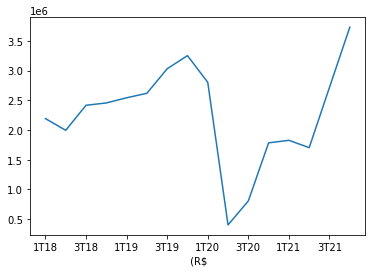

In [379]:
Valuation.loc['Receita Real'].plot();

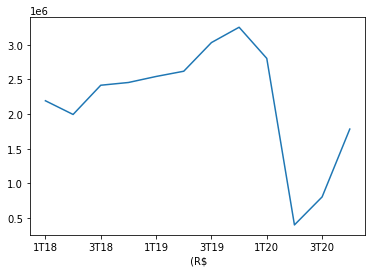

In [380]:
Valuation.loc['Receita Real'].iloc[:12].plot();

In [381]:
# Nesse caso é mais complicado, vou criar uma taxa de crescimento pro ano de 21 pra quase recuperar
# o nível pré pandemia e depois uma taxa que é a média pré pandemia de crescimento pros anos seguintes.
growth_rate_rec_t3 = ((1+0.85) ** (1/4)) - 1

In [382]:
growth_rate_rec_t3

0.1662534248067804

In [383]:
growth_rate_t3 = Valuation.loc['Receita Real'].iloc[:8].pct_change().mean() * 0.8

In [384]:
growth_rate_t3

0.049531068866287414

In [385]:
# Receita último trimestre de 2020
revQ_20 = Valuation.loc['Receita Real'].iloc[11]

In [386]:
forecast_t3 = pd.DataFrame(columns=DRE_Q.columns)

In [387]:
forecast_t3[['1T22', '2T22', '3T22', '4T22', '1T23', '2T23', '3T23', '4T23']] = ""

In [388]:
forecast_t3.loc['Revenue_t3'] = ""

In [389]:
forecast_t3

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,...,3T21,4T21,1T22,2T22,3T22,4T22,1T23,2T23,3T23,4T23
Revenue_t3,,,,,,,,,,,...,,,,,,,,,,


In [390]:
Revenue_t3 = []
x = revQ_20
for i in range(12, 16):  # Esse primeiro loop aplica a taxa de crescimento, para recuperar no primeiro ano (2021)
    x = x * (1 + growth_rate_rec_t3)
    Revenue_t3.append(x)
y = Revenue_t3[-1]
for i in range(16, len(forecast_t3.loc['Revenue_t3'])):
    y = y * (1 + growth_rate_t3) # Esse segundo loop pega uma média de crescimento pré COVID para os anos seguintes
    Revenue_t3.append(y)

In [391]:
Revenue_t3 = pd.DataFrame(Revenue_t3, index=forecast_t3.columns[12:]).T

In [392]:
Revenue_t3 = Revenue_t3.rename(index={0: 'Revenue_t3'})

In [393]:
forecast_t3 = forecast_t3.iloc[1: , :]

In [394]:
forecast_t3 = forecast_t3.append(Revenue_t3)

### NOPAT Estimado

In [395]:
forecast_t3.loc['NOPAT_t3'] = ind.loc['Margem NOPAT'].iloc[:8].mean() * forecast_t3.loc['Revenue_t3']

### Variação da Necessidade de Capital de Giro

In [396]:
forecast_t3.loc['Revenue_t3', '4T20'] = revQ_20

In [397]:
VarNCG_t3 = []
for i in range(12, 16):
    x = ind.loc['Ciclo Financeiro $', '4T20'] # O mesmo efeito de separar a recuperação da COVID ocorre aqui
    x = x * (forecast_t3.loc['Revenue_t3'].iloc[i] - forecast_t3.loc['Revenue_t3'].iloc[i-1]) # as taxas de 
    VarNCG_t3.append(x)     # crescimento e de Alanvancagem estavam muito distorcidas, por isso a separação
y = VarNCG_t3[-1]
for i in range(16, len(forecast_t3.loc['Revenue_t3'])):
    y = ind.loc['Ciclo Financeiro $'].iloc[4:8].mean()
    y = y * (forecast_t3.loc['Revenue_t3'].iloc[i] - forecast_t3.loc['Revenue_t3'].iloc[i-1])
    VarNCG_t3.append(y)

In [398]:
VarNCG_t3 = pd.DataFrame(VarNCG_t3, index=forecast_t3.columns[12:]).T

In [399]:
VarNCG_t3 = VarNCG_t3.rename(index={0: 'VarNCG_t3'})

In [400]:
forecast_t3 = forecast_t3.append(VarNCG_t3)

### CAPEX

In [401]:
display(DFC.loc['CAPEX'].iloc[8:12]/ind.loc['Receita Op Liquida'].iloc[8:12])
(DFC.loc['CAPEX'].iloc[8:12]/ind.loc['Receita Op Liquida'].iloc[8:12]).mean()

1T20   -0.088772
2T20    -0.15837
3T20   -0.103312
4T20   -0.053709
dtype: object

-0.10104090732473438

In [402]:
CAPEX_t3 = []
x = DFC.loc['CAPEX'].iloc[:8].mean()
for i in range(12, len(forecast_t3.loc['Revenue_t3'])):
    x = x * (1 + 0.06 ** 2) # A taxa de crescimento é reduzida bastante aqui, não só pela pandemia, mas pelas 
    CAPEX_t3.append(x)  # ordens já realizadas de renovação da frota (Embraer-E2, A320 e A330 Neo)

In [403]:
CAPEX_t3 = pd.DataFrame(CAPEX_t3, index=forecast_t3.columns[12:]).T

In [404]:
CAPEX_t3 = CAPEX_t3.rename(index={0: 'CAPEX_t3'})

In [405]:
forecast_t3 = forecast_t3.append(CAPEX_t3)

### Depreciação

In [406]:
Deprec_t3 = []
x = Valuation.loc['Depreciação Real'].iloc[:8].mean() # a taxa de depreciação segue as outras variáveis
for i in range(12, len(forecast_t3.loc['Revenue_t3'])):
    x = x * (1 + growth_rate_t3)
    Deprec_t3.append(x)

In [407]:
Deprec_t3 = pd.DataFrame(Deprec_t3, index=forecast_t3.columns[12:]).T

In [408]:
Deprec_t3 = Deprec_t3.rename(index={0: 'Deprec_t3'})

In [409]:
forecast_t3 = forecast_t3.append(Deprec_t3)

### Financiamento

In [410]:
# Diferença % da divida de Longo Prazo no final de 2020 com o final de 2019
BP.loc['Empréstimos e financiamentos', '4T20']/BP.loc['Empréstimos e financiamentos', '4T19'] - 1

1.1410385293828074

In [411]:
Financiamento_t3 = []
x = DFC.loc['Empréstimos'].iloc[:8].mean() * 1.2 # A taxa de financiamento deixou de ser flat, por conta dos 
for i in range(12, len(forecast_t3.loc['Revenue_t3'])):  # Muitos empréstimos feitos durante a pandemia.
    x = x
    Financiamento_t3.append(x)

In [412]:
Financiamento_t3 = pd.DataFrame(Financiamento_t3, index=forecast_t3.columns[12:]).T

In [413]:
Financiamento_t3 = Financiamento_t3.rename(index={0: 'Financiamento_t3'})

In [414]:
forecast_t3 = forecast_t3.append(Financiamento_t3)

In [415]:
forecast_t3.iloc[:,12:]

(R$,1T21,2T21,3T21,4T21,1T22,2T22,3T22,4T22,1T23,2T23,3T23,4T23
Revenue_t3,2.080214e+06,2.426057e+06,2.829397e+06,3.299794e+06,3.463237e+06,3.634774e+06,3.814809e+06,4.003760e+06,4.202071e+06,4.410204e+06,4.628646e+06,4.857908e+06
NOPAT_t3,3.359237e+05,3.917722e+05,4.569057e+05,5.328678e+05,5.592613e+05,5.869621e+05,6.160350e+05,6.465478e+05,6.785721e+05,7.121825e+05,7.474576e+05,7.844800e+05
VarNCG_t3,-1.179320e+06,-1.375386e+06,-1.604048e+06,-1.870727e+06,-1.895918e+05,-1.989824e+05,-2.088383e+05,-2.191822e+05,-2.300386e+05,-2.414326e+05,-2.533910e+05,-2.659418e+05
CAPEX_t3,-2.864149e+05,-2.874460e+05,-2.884808e+05,-2.895193e+05,-2.905616e+05,-2.916076e+05,-2.926574e+05,-2.937110e+05,-2.947683e+05,-2.958295e+05,-2.968945e+05,-2.979633e+05
Deprec_t3,-3.772308e+05,-3.959154e+05,-4.155256e+05,-4.361070e+05,-4.577078e+05,-4.803786e+05,-5.041723e+05,-5.291444e+05,-5.553535e+05,-5.828608e+05,-6.117305e+05,-6.420302e+05
Financiamento_t3,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04,-2.529000e+04


In [416]:
forecast_t3.loc['WACC_t3'] = WACC.loc['WACC']

In [417]:
forecast_t3.loc['FCFirma_t3'] = (forecast_t3.loc['NOPAT_t3'] \
                            + forecast_t3.loc['VarNCG_t3'] \
                            - forecast_t3.loc['Deprec_t3'] \
                            + forecast_t3.loc['CAPEX_t3'] \
                            + forecast_t3.loc['Financiamento_t3']) 

In [418]:
forecast_t3.iloc[-1,8:12].mean()

nan

In [419]:
DCF_t3 = pd.DataFrame(columns=[2021,2022,2023,'perp_t3'])

In [420]:
DCF_t3

,2021,2022,2023,perp_t3


In [421]:
DCF_t3.loc['FCFirma_t3', 2021] = forecast_t3.iloc[-1,12:16].sum()
DCF_t3.loc['FCFirma_t3', 2022] = forecast_t3.iloc[-1,16:20].sum()
DCF_t3.loc['FCFirma_t3', 2023] = forecast_t3.iloc[-1,20:24].sum()
DCF_t3.loc['WACC_t3'] = WACC.iloc[-1,8:12].mean()

In [422]:
g_2020 = (1+0.034)*(1+0.0332)-1 # Dados tirados do Boletim Focus de 31/12/2020, Disponível em: 
                                #
                                # Também nas pastas com os anexos

In [423]:
g_2020

0.06832879999999997

In [424]:
DCF_t3.loc['FCFirma_t3', 'perp_t3'] = DCF_t3.loc['FCFirma_t3',2023] / (DCF_t3.loc['WACC_t3',2021] - g_2020)

In [425]:
DCF_t3.loc['Data_t3'] = [1,2,3,3]

In [426]:
Valor_Firma_t3 = DCF_t3.loc['FCFirma_t3'] / (1 + DCF_t3.loc['WACC_t3']) ** DCF_t3.loc['Data_t3'] 

In [427]:
Valor_Firma_t3 = sum(Valor_Firma_t3) - ind.loc['Dívida'].iloc[8:12].sum()

In [428]:
Valor_Firma_t3

11749700.582355969

In [429]:
Valor_Firma_t3/ind.loc['n_shares', '4T20']*1000

35.62897502850381

In [430]:
ind.loc['price_shares', '4T20']

37.72999954223633

# Valuation em T4

#### Nesse as projeções voltam a ser únicas, mas o número de crescimento são uma média pré-pandemia com uma punição por demanda ainda voltando e incertezas ainda pairando

### Receita Estimada

In [587]:
# Variação Média de receita por trimestre
growth_rate_t4 = Valuation.loc['Receita Real'].iloc[:8].pct_change().mean() * 0.7

In [588]:
# Receita média por trimestre
revQ_21 = Valuation.loc['Receita Real'].iloc[-1]

In [589]:
forecast_t4 = pd.DataFrame(columns=DRE_Q.columns)

In [590]:
forecast_t4[['1T22', '2T22', '3T22', '4T22', '1T23', '2T23', '3T23', '4T23', '1T24', '2T24', '3T24', '4T24']] = ""

In [591]:
forecast_t4.loc['Revenue_t4'] = ""

In [592]:
forecast_t4

(R$,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,...,3T22,4T22,1T23,2T23,3T23,4T23,1T24,2T24,3T24,4T24
Revenue_t4,,,,,,,,,,,...,,,,,,,,,,


In [593]:
Revenue_t4 = []
x = revQ_21
for i in range(16, len(forecast_t4.loc['Revenue_t4'])):
    x = x * (1 + growth_rate_t4)
    Revenue_t4.append(x)

In [594]:
Revenue_t4 = pd.DataFrame(Revenue_t4, index=forecast_t4.columns[16:]).T

In [595]:
Revenue_t4

(R$,1T22,2T22,3T22,4T22,1T23,2T23,3T23,4T23,1T24,2T24,3T24,4T24
0,3.891386e+06,4.060037e+06,4.235998e+06,4.419585e+06,4.611128e+06,4.810973e+06,5.019479e+06,5.237022e+06,5.463993e+06,5.700800e+06,5.947871e+06,6.205650e+06


In [596]:
Revenue_t4 = Revenue_t4.rename(index={0: 'Revenue_t4'})

In [597]:
forecast_t4 = forecast_t4.iloc[1: , :]

In [598]:
forecast_t4 = forecast_t4.append(Revenue_t4)

### NOPAT Estimado

In [599]:
forecast_t4.loc['NOPAT_t4'] = ind.loc['Margem NOPAT'].iloc[:8].mean() * forecast_t4.loc['Revenue_t4']

### Variação da Necessidade de Capital de Giro

In [600]:
forecast_t4.loc['Revenue_t4', '4T21'] = revQ_21

In [601]:
VarNCG_t4 = []
for i in range(16, len(forecast_t4.loc['Revenue_t4'])):
    x = ind.loc['Ciclo Financeiro $'].mean()
    x = x * (forecast_t4.loc['Revenue_t4'].iloc[i] - forecast_t4.loc['Revenue_t4'].iloc[i-1])
    VarNCG_t4.append(x)

In [602]:
VarNCG_t4 = pd.DataFrame(VarNCG_t4, index=forecast_t4.columns[16:]).T

In [603]:
VarNCG_t4 = VarNCG_t4.rename(index={0: 'VarNCG_t4'})

In [604]:
forecast_t4 = forecast_t4.append(VarNCG_t4)

### CAPEX

In [605]:
display(DFC.loc['CAPEX'].iloc[-4:]/ind.loc['Receita Op Liquida'].iloc[-4:])
(DFC.loc['CAPEX'].iloc[-4:]/ind.loc['Receita Op Liquida'].iloc[-4:]).mean()

1T21   -0.130297
2T21   -0.077539
3T21   -0.052616
4T21   -0.076145
dtype: object

-0.08414935114918257

In [606]:
CAPEX_t4 = []
x = DFC.loc['CAPEX'].mean()
for i in range(16, len(forecast_t4.loc['Revenue_t4'])):
    x = x * (1 + 0.1 ** 2)
    CAPEX_t4.append(x)

In [607]:
CAPEX_t4 = pd.DataFrame(CAPEX_t4, index=forecast_t4.columns[16:]).T

In [608]:
CAPEX_t4 = CAPEX_t4.rename(index={0: 'CAPEX_t4'})

In [609]:
forecast_t4 = forecast_t4.append(CAPEX_t4)

### Depreciação

In [610]:
Deprec_t4 = []
x = Valuation.loc['Depreciação Real'].mean()
for i in range(16, len(forecast_t4.loc['Revenue_t4'])):
    x = x * (1 + growth_rate_t4)
    Deprec_t4.append(x)

In [611]:
Deprec_t4 = pd.DataFrame(Deprec_t4, index=forecast_t4.columns[16:]).T

In [612]:
Deprec_t4 = Deprec_t4.rename(index={0: 'Deprec_t4'})

In [613]:
forecast_t4 = forecast_t4.append(Deprec_t4)

### Financiamento

In [614]:
Financiamento_t4 = []
x = DFC.loc['Empréstimos'].mean() * 1.2 # Ainda continuo com o múltiplo pelo alto volume de empréstimos tomados
for i in range(16, len(forecast_t4.loc['Revenue_t4'])):   # durante a pandemia
    x = x
    Financiamento_t4.append(x)

In [615]:
Financiamento_t4 = pd.DataFrame(Financiamento_t4, index=forecast_t4.columns[16:]).T

In [616]:
Financiamento_t4 = Financiamento_t4.rename(index={0: 'Financiamento_t4'})

In [617]:
forecast_t4 = forecast_t4.append(Financiamento_t4)

In [618]:
forecast_t4.iloc[:,16:]

(R$,1T22,2T22,3T22,4T22,1T23,2T23,3T23,4T23,1T24,2T24,3T24,4T24
Revenue_t4,3.891386e+06,4.060037e+06,4.235998e+06,4.419585e+06,4.611128e+06,4.810973e+06,5.019479e+06,5.237022e+06,5.463993e+06,5.700800e+06,5.947871e+06,6.205650e+06
NOPAT_t4,6.284010e+05,6.556357e+05,6.840508e+05,7.136973e+05,7.446287e+05,7.769007e+05,8.105713e+05,8.457013e+05,8.823537e+05,9.205946e+05,9.604929e+05,1.002120e+06
VarNCG_t4,-5.556943e+05,-5.797779e+05,-6.049053e+05,-6.311217e+05,-6.584743e+05,-6.870124e+05,-7.167873e+05,-7.478526e+05,-7.802643e+05,-8.140807e+05,-8.493627e+05,-8.861738e+05
CAPEX_t4,-2.254446e+05,-2.276991e+05,-2.299761e+05,-2.322758e+05,-2.345986e+05,-2.369446e+05,-2.393140e+05,-2.417072e+05,-2.441242e+05,-2.465655e+05,-2.490311e+05,-2.515214e+05
Deprec_t4,-4.007812e+05,-4.181510e+05,-4.362735e+05,-4.551814e+05,-4.749089e+05,-4.954913e+05,-5.169657e+05,-5.393708e+05,-5.627470e+05,-5.871363e+05,-6.125826e+05,-6.391317e+05
Financiamento_t4,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05,3.146475e+05


In [619]:
forecast_t4.loc['WACC_t4'] = WACC.loc['WACC']

In [620]:
forecast_t4.loc['FCFirma_t4'] = (forecast_t4.loc['NOPAT_t4'] \
                            + forecast_t4.loc['VarNCG_t4'] \
                            - forecast_t4.loc['Deprec_t4'] \
                            + forecast_t4.loc['CAPEX_t4'] \
                            + forecast_t4.loc['Financiamento_t4']) 

In [621]:
# Média do WACC
forecast_t4.iloc[-2,12:16].mean()

0.1491555272677277

In [622]:
DCF_t4 = pd.DataFrame(columns=[2022,2023,2024,'perp_t4'])

In [623]:
DCF_t4

,2022,2023,2024,perp_t4


In [624]:
DCF_t4.loc['FCFirma_t4', 2022] = forecast_t4.iloc[-1,16:20].sum()
DCF_t4.loc['FCFirma_t4', 2023] = forecast_t4.iloc[-1,20:24].sum()
DCF_t4.loc['FCFirma_t4', 2024] = forecast_t4.iloc[-1,24:28].sum()
DCF_t4.loc['WACC_t4'] = WACC.iloc[-1,12:16].mean()

In [625]:
g_2021 = (1+0.0503)*(1+0.0036)-1 # Dados tirados do Boletim Focus de 31/12/2021, Disponível em: 
                                #
                                # Também nas pastas com os anexos

In [626]:
g_2021

0.054081080000000004

In [627]:
DCF_t4.loc['FCFirma_t4', 'perp_t4'] = DCF_t4.loc['FCFirma_t4',2024] / (DCF_t4.loc['WACC_t4',2022] - g_2021)

In [628]:
DCF_t4.loc['Data_t4'] = [1,2,3,3]

In [629]:
Valor_Firma_t4 = DCF_t4.loc['FCFirma_t4'] / (1 + DCF_t4.loc['WACC_t4']) ** DCF_t4.loc['Data_t4'] 

In [630]:
Valor_Firma_t4 = sum(Valor_Firma_t4) - ind.loc['Dívida'].iloc[12:].sum()

In [631]:
Valor_Firma_t4

2911122.9487333223

In [632]:
Valor_Firma_t4/ind.loc['n_shares', '4T21']*1000

8.73460190121576

In [633]:
ind.loc['price_shares', '4T21']

24.420000076293945

# Output

In [634]:
output = pd.DataFrame(columns=[2017,2018,2019,2020,2021])

In [635]:
output.loc['Preço real'] = [ind.loc['price_shares', '1T18'], 
                            ind.loc['price_shares', '4T18'], \
                            ind.loc['price_shares', '4T19'], \
                            ind.loc['price_shares', '4T20'], \
                            ind.loc['price_shares', '4T21']]

In [636]:
output.loc['Preço estimado'] = [ind.loc['price_shares', '1T18'], \
                               Valor_Firma/ind.loc['n_shares', '4T18']*1000, \
                               Valor_Firma_t2/ind.loc['n_shares', '4T19']*1000, \
                               Valor_Firma_t3/ind.loc['n_shares', '4T20']*1000, \
                               Valor_Firma_t4/ind.loc['n_shares', '4T21']*1000]

In [637]:
output.iloc[:,1:]

,2018,2019,2020,2021
Preço real,36.330002,58.799999,37.730000,24.420000
Preço estimado,14.210369,76.265282,35.628975,8.734602


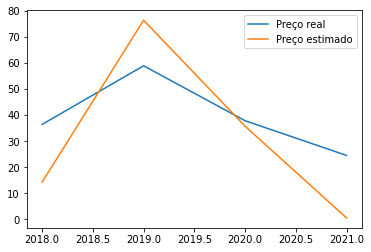

In [586]:
output.iloc[:,1:].T.plot();

In [313]:
upside = output.loc['Preço estimado', 2021]/output.loc['Preço real', 2021]-1

In [314]:
upside

6.598401876924511

In [640]:
DCF.to_excel(r'tabelas\DCF.xlsx', index=True)
DCF_t2.to_excel(r'tabelas\DCF_t2.xlsx', index=True)
DCF_t3.to_excel(r'tabelas\DCF_t3.xlsx', index=True)
DCF_t4.to_excel(r'tabelas\DCF_t4.xlsx', index=True)

In [641]:
output.to_excel(r'tabelas\output.xlsx', index=True)